In [85]:
import seaborn as sns;
import pandas as pn;
import numpy as np;
import matplotlib.pyplot as plt;
import sklearn as sk;

In [86]:
df = pn.read_csv('./Data/titanic.csv');

In [87]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


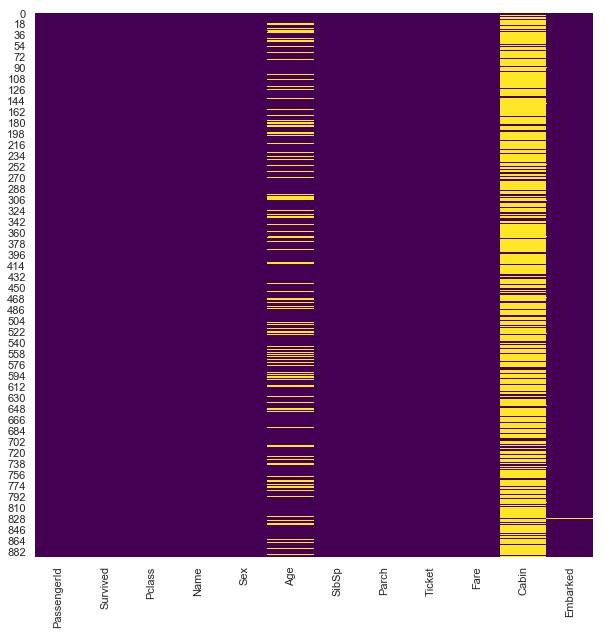

In [88]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

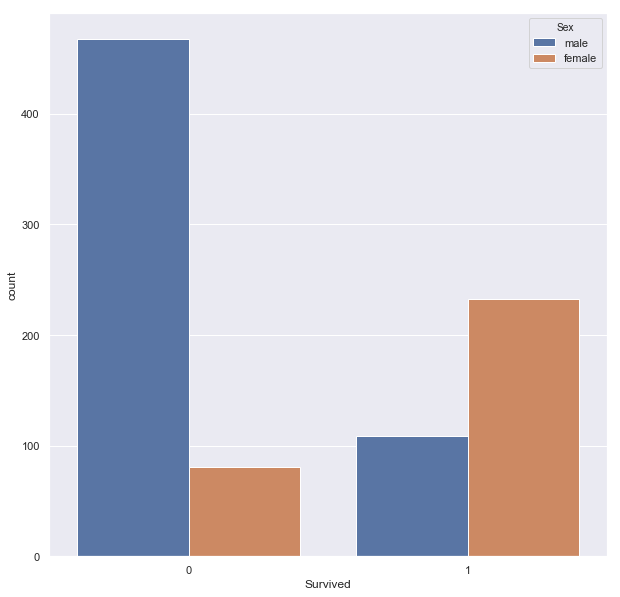

In [89]:
sns.countplot(x='Survived', data=df, hue='Sex');

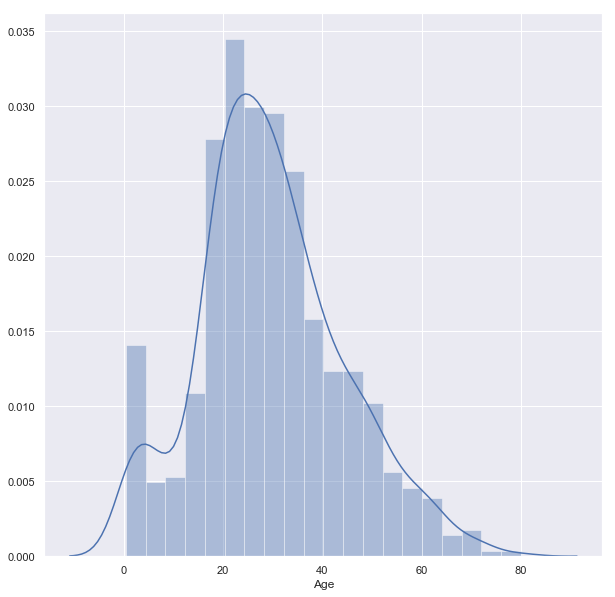

In [90]:
sns.distplot(df['Age'].dropna())

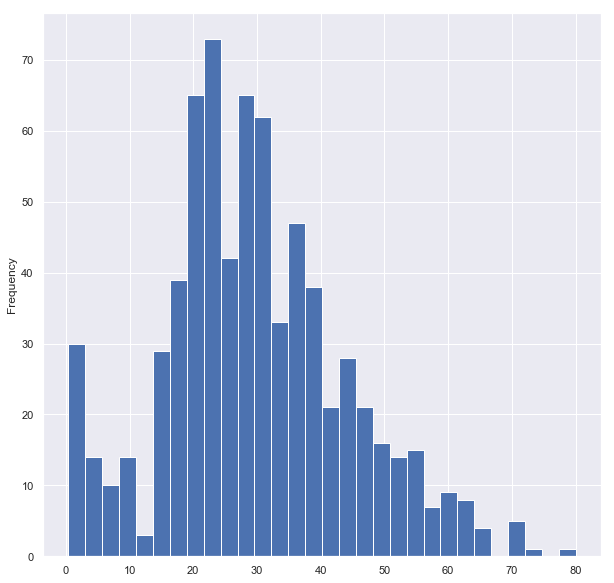

In [91]:
df['Age'].plot.hist(bins=30)

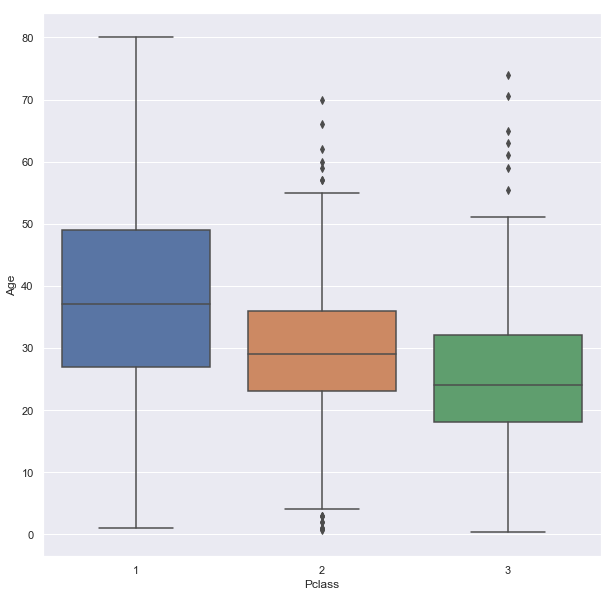

In [92]:
sns.set(rc={'figure.figsize': (10,10)})
sns.boxplot(x='Pclass', y='Age', data=df);

In [93]:
c1_avg = c1_avg = df[df['Pclass'] == 1].median()['Age'];
c2_avg = c1_avg = df[df['Pclass'] == 2].median()['Age'];
c3_avg = c1_avg = df[df['Pclass'] == 3].median()['Age'];
def age_calc(p):
    age = p[0];
    pclass = p[1];
    if pn.isnull(age):
        if(pclass == 1):
            return c1_avg
        elif(pclass == 2):
            return c2_avg
        else:
            return c3_avg
    return age;

In [94]:
df['Age'] = df[['Age', 'Pclass']].apply(age_calc, axis=1)

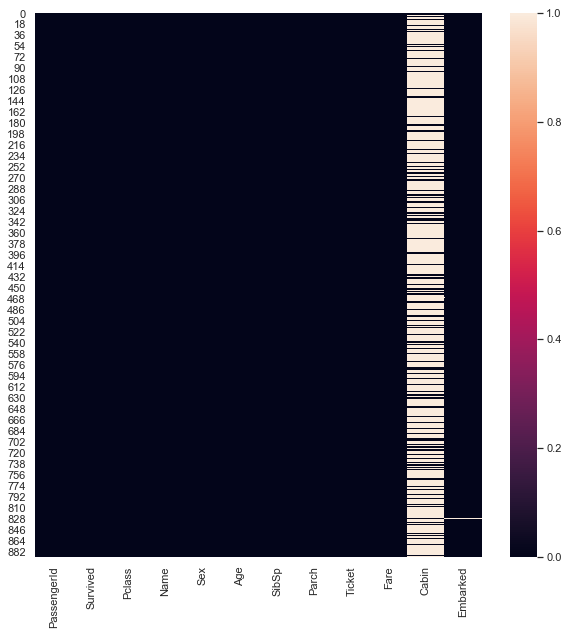

In [95]:
sns.heatmap(df.isnull())

In [96]:
df.drop('Cabin', axis=1, inplace=True)

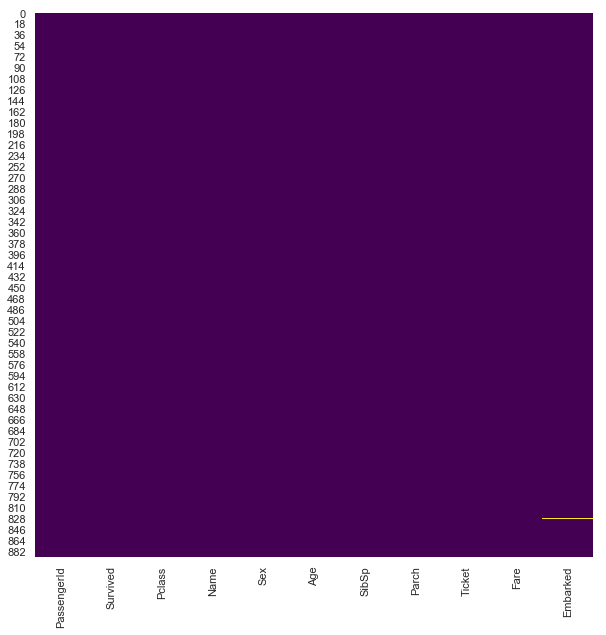

In [97]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [98]:
df.dropna(inplace=True)

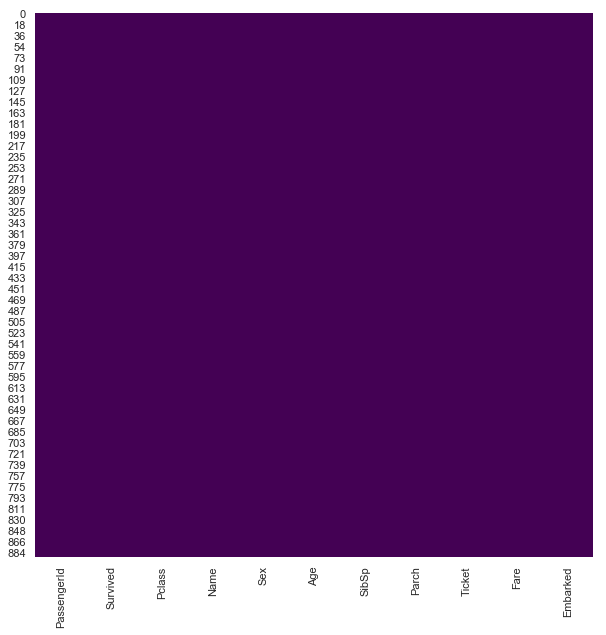

In [99]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [100]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1});

In [101]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [102]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True);

In [103]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [104]:
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3});

In [105]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [106]:
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LogisticRegression;

In [107]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1).values, df['Survived'].values, test_size=0.32, random_state=2);

In [108]:
lor = LogisticRegression();

In [109]:
lor.fit(x_train, y_train);

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
y_pred = lor.predict(x_test);

In [111]:
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import accuracy_score;

In [112]:
confusion_matrix(y_test, y_pred)

array([[162,  19],
       [ 25,  79]])

In [113]:
accuracy_score(y_test, y_pred)

0.8456140350877193